# ECS 174 HW1

# Section 1: Coding Assignment

In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
## Please do not use cv2 or scipy

In [3]:
# show and save a ndarray as an image
def img_save(img_array, file_name, title= '', show = True, cmap=None):

    if show:
        plt.imshow(img_array.astype(np.uint8), cmap = cmap)
        plt.title(title)
        plt.show()

    plt.imsave(file_name, img_array.astype(np.uint8), cmap = cmap)

In [22]:
def convolution(image, filter):
    """Applies a convolution filter to an image."""
    if image.ndim == 3:
        img_height, img_width, num_channels = image.shape
    else:  # Grayscale image
        img_height, img_width = image.shape
        num_channels = 1

    filter_height, filter_width = filter.shape

    # Calculate padding size
    pad_height = filter_height // 2
    pad_width = filter_width // 2

    # Pad the image with zeros
    if num_channels == 1:
        padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    else:
        padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)

    # Output image after convolution
    img_convolved = np.zeros_like(image, dtype=np.float32)

    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            if num_channels == 1:
                # Extract the region of interest for grayscale
                region = padded_image[i:i + filter_height, j:j + filter_width]
                # Apply the filter (element-wise multiplication and summation)
                img_convolved[i, j] = np.sum(region * filter)
            else:
                for c in range(num_channels):
                    # Extract the region of interest for each channel
                    region = padded_image[i:i + filter_height, j:j + filter_width, c]
                    # Apply the filter (element-wise multiplication and summation)
                    img_convolved[i, j, c] = np.sum(region * filter)

    return img_convolved

## Q1

In [23]:
def GaussianKernel2D(size, sigma):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)


def GaussianBlurImage(image, sigma):
    ## define Gaussian filter
    filter_size = 2 * int(sigma * 4 + 0.5) + 1
    G_filter = GaussianKernel2D(filter_size, sigma)

    ## and convolve
    img_blurred = convolution(image, G_filter)

    return img_blurred

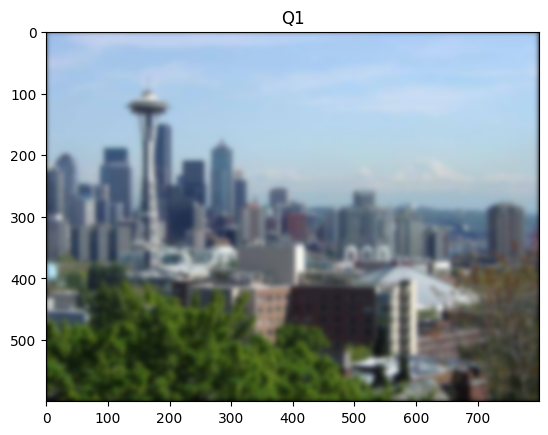

In [47]:
img_seattle = Image.open('/content/Seattle.jpg') ## replace path
img_seattle = np.array(img_seattle).astype(np.uint8)
img_1 = GaussianBlurImage(img_seattle, sigma=4.0)
img_save(img_1, '1.png', 'Q1', show = True)

## Q2

In [32]:
def GaussianKernel1D(size, sigma):
    """Generates a 1D Gaussian kernel."""
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    return gauss / np.sum(gauss)

def HorizontalConvolution1D(image, kernel):
    """Applies a 1D convolution along the horizontal axis."""
    pad_width = kernel.shape[0] // 2
    # Pad the image along the horizontal axis
    padded_image = np.pad(image, ((0, 0), (pad_width, pad_width), (0, 0)), mode='constant', constant_values=0)
    img_convolved = np.zeros_like(image, dtype=np.float32)

    # Perform the convolution
    for i in range(image.shape[0]):  # Iterate over rows
        for j in range(image.shape[1]):  # Iterate over columns
            for c in range(image.shape[2]):  # Iterate over channels
                # Apply the convolution to each channel separately
                img_convolved[i, j, c] = np.sum(padded_image[i, j:j + kernel.shape[0], c] * kernel)

    return img_convolved

def VerticalConvolution1D(image, kernel):
    """Applies a 1D convolution along the vertical axis."""
    pad_width = kernel.shape[0] // 2
    # Pad the image along the vertical axis
    padded_image = np.pad(image, ((pad_width, pad_width), (0, 0), (0, 0)), mode='constant', constant_values=0)
    img_convolved = np.zeros_like(image, dtype=np.float32)

    # Perform the convolution
    for i in range(image.shape[0]):  # Iterate over rows
        for j in range(image.shape[1]):  # Iterate over columns
            for c in range(image.shape[2]):  # Iterate over channels
                # Apply the convolution to each channel separately
                img_convolved[i, j, c] = np.sum(padded_image[i:i + kernel.shape[0], j, c] * kernel)

    return img_convolved

def SeparableGaussianBlurImage(image, sigma):
    """Applies Gaussian blur to an image using separable filters."""
    # Define the 1D Gaussian filter
    filter_size = 2 * int(sigma * 4 + 0.5) + 1
    filter_1d = GaussianKernel1D(filter_size, sigma)

    # If the image is grayscale, add a channel dimension
    if image.ndim == 2:
        image = image[:, :, np.newaxis]

    img_blurred = HorizontalConvolution1D(image, filter_1d)

    img_blurred = VerticalConvolution1D(img_blurred, filter_1d)

    img_blurred = np.clip(img_blurred, 0, 255).astype(np.uint8)

    return img_blurred

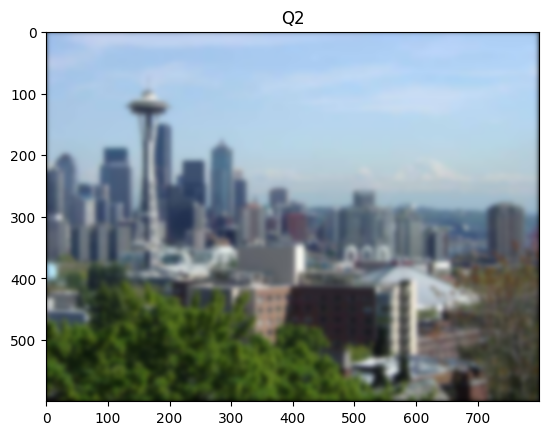

In [33]:
img_2 = SeparableGaussianBlurImage(img_seattle, sigma=4.0)
img_save(img_2, '2.png', 'Q2', show = True)

## Q3


In [35]:
# Q3
def SobelImage(image):

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1], [ 0,  0,  0], [ 1,  2,  1]], dtype=np.float32)

    vertical_edge = convolution(image, sobel_x)
    horizontal_edge = convolution(image, sobel_y)

    magnitude = np.sqrt(vertical_edge**2 + horizontal_edge**2)
    orientation = np.arctan2(horizontal_edge, vertical_edge)

    return magnitude, orientation, vertical_edge, horizontal_edge

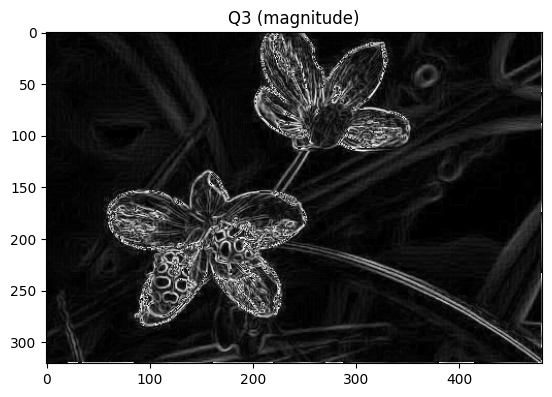

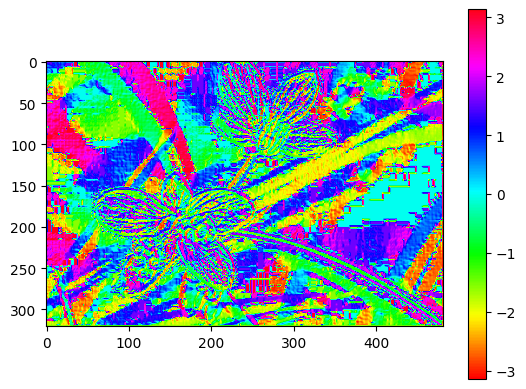

In [37]:
img_ladybug = Image.open('/content/LadyBug.jpg').convert('L') ##
img_ladybug = np.array(img_ladybug).astype(np.uint8)
magnitude, orientation, vertical_edge, horizontal_edge = SobelImage(img_ladybug)

img_save(magnitude, '5a.png', 'Q3 (magnitude)', show = True, cmap = 'gray')

## orientation is represented in radians, ranging from -pi to +pi, better not normalizing or convert to uint8
plt.imshow(orientation, cmap = plt.cm.hsv) ## no astype(np.uint8)
plt.colorbar()
plt.show()
plt.imsave('5b.png', orientation, cmap = plt.cm.hsv)

## Q4

In [38]:
# Q4
def NNInterpolation(image, x, y):
    """Performs nearest neighbor interpolation for a given (x, y) coordinate in the image."""
    # Get the nearest integer coordinates
    x_nearest = int(round(x))
    y_nearest = int(round(y))

    x_nearest = min(max(x_nearest, 0), image.shape[1] - 1)
    y_nearest = min(max(y_nearest, 0), image.shape[0] - 1)

    pixel_value = image[y_nearest, x_nearest]

    return pixel_value

def BilinearInterpolation(image, x, y):
    """Performs bilinear interpolation for a given (x, y) coordinate in the image."""
    # Get the dimensions of the image
    img_height, img_width = image.shape[:2]

    # Ensure x and y are within bounds
    if x < 0 or x >= img_width - 1 or y < 0 or y >= img_height - 1:
        return NNInterpolation(image, x, y)

    # Get the integer coordinates surrounding (x, y)
    x0, y0 = int(np.floor(x)), int(np.floor(y))
    x1, y1 = min(x0 + 1, img_width - 1), min(y0 + 1, img_height - 1)

    # Get the fractional parts of (x, y)
    dx, dy = x - x0, y - y0

    # Get the pixel values at the four corners
    I00 = image[y0, x0]  # Top-left
    I10 = image[y0, x1]  # Top-right
    I01 = image[y1, x0]  # Bottom-left
    I11 = image[y1, x1]  # Bottom-right

    # Perform bilinear interpolation
    I_top = (1 - dx) * I00 + dx * I10
    I_bottom = (1 - dx) * I01 + dx * I11

    pixel_value = (1 - dy) * I_top + dy * I_bottom

    return pixel_value


def UpSampling(image, factor, interpolation):

    ## img_array.shape = (Height, Width)
    width_up = image.shape[1]*factor
    height_up = image.shape[0]*factor

    img_upsampled = np.zeros((height_up, width_up, image.shape[2]), dtype = np.uint8)

    for i in range(height_up):
        for j in range(width_up):
            x = j / factor
            y = i / factor
            if interpolation == "Bilinear":
                img_upsampled[i][j] = BilinearInterpolation(image, x, y)
            else:
                img_upsampled[i][j] = NNInterpolation(image, x, y)

    return img_upsampled

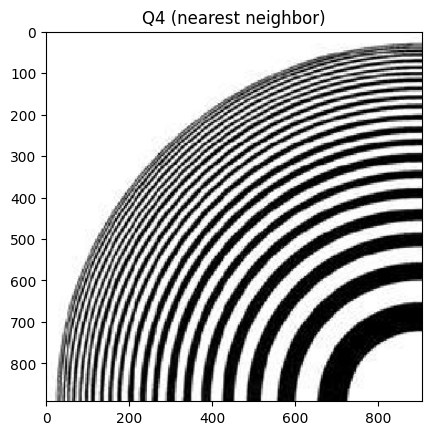

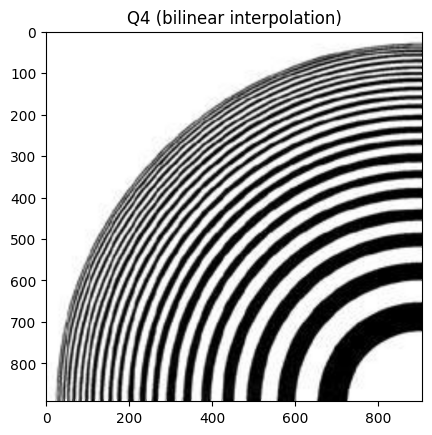

In [39]:
img_moire = Image.open('/content/Moire_small.jpg') ##
img_moire = np.array(img_moire).astype(np.uint8)
moire_nn = UpSampling(img_moire, factor=4, interpolation="NN")
moire_bilinear = UpSampling(img_moire, factor=4, interpolation="Bilinear")
img_save(moire_nn, '6a.png', 'Q4 (nearest neighbor)', show = True)
img_save(moire_bilinear, '6b.png', 'Q4 (bilinear interpolation)', show = True)

## Q5

In [45]:
# Q5 (extra credit)

def BilateralImage(image, sigmaS, sigmaI):
    """Applies bilateral filtering to an image, preserving colors for RGB images."""
    # Check if the image is in color
    if image.ndim == 3:  # Color image
        # Split the image into three color channels
        img_filtered = np.zeros_like(image)
        for c in range(3):  # Apply the filter to each color channel separately
            img_filtered[:, :, c] = BilateralFilterGrayscale(image[:, :, c], sigmaS, sigmaI)
    else:  # Grayscale image
        img_filtered = BilateralFilterGrayscale(image, sigmaS, sigmaI)

    return img_filtered

def BilateralFilterGrayscale(image, sigmaS, sigmaI):
    """Applies bilateral filtering to a grayscale image."""
    # Convert image to float32
    image = image.astype(np.float32)

    img_height, img_width = image.shape
    filter_radius = int(2 * sigmaS + 0.5)

    img_filtered = np.zeros_like(image)

    # Pre-compute the spatial Gaussian weights
    spatial_weights = np.zeros((2 * filter_radius + 1, 2 * filter_radius + 1), dtype=np.float32)
    for i in range(-filter_radius, filter_radius + 1):
        for j in range(-filter_radius, filter_radius + 1):
            spatial_weights[i + filter_radius, j + filter_radius] = np.exp(-(i**2 + j**2) / (2 * sigmaS**2))

    spatial_weights /= np.sum(spatial_weights)

    # Apply the bilateral filter
    for i in range(img_height):
        for j in range(img_width):
            # Initialize the weighted sum and the normalization factor
            weighted_sum = 0.0
            normalization_factor = 0.0

            # Loop over the filter window
            for di in range(-filter_radius, filter_radius + 1):
                for dj in range(-filter_radius, filter_radius + 1):
                    # Compute the neighbor's coordinates
                    ni = i + di
                    nj = j + dj

                    # Check if the neighbor is inside the image bounds
                    if 0 <= ni < img_height and 0 <= nj < img_width:
                        # Compute the intensity weight
                        intensity_diff = image[ni, nj] - image[i, j]
                        intensity_weight = np.exp(-(intensity_diff**2) / (2 * sigmaI**2))

                        # Compute the bilateral weight
                        bilateral_weight = spatial_weights[di + filter_radius, dj + filter_radius] * intensity_weight

                        # Accumulate the weighted sum and the normalization factor
                        weighted_sum += bilateral_weight * image[ni, nj]
                        normalization_factor += bilateral_weight

            # Compute the filtered pixel value
            img_filtered[i, j] = weighted_sum / normalization_factor

    # Clip the values to the valid range and convert to uint8
    img_filtered = np.clip(img_filtered, 0, 255).astype(np.uint8)

    return img_filtered


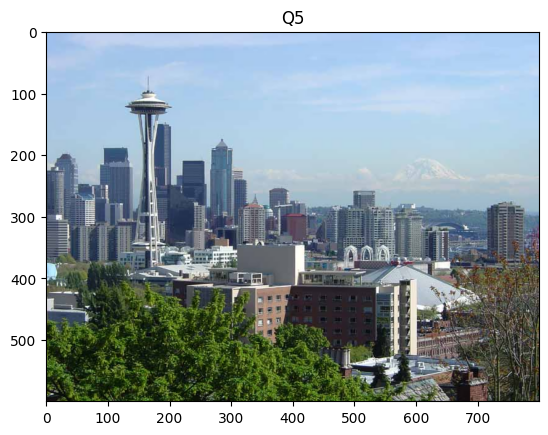

In [49]:
img_seattle = Image.open('/content/Seattle.jpg') ## replace path
img_seattle = np.array(img_seattle).astype(np.uint8)

sigmaS = 1.0
sigmaI = 3.0
img_bilateral = BilateralImage(img_seattle, sigmaS, sigmaI)
img_save(img_bilateral, 'bilateral.png', 'Q5', show = True)

# Section 2: Written Assignment

# Q1

In [1]:
def DownSampling(image, factor):
    """Downsamples an image by a given factor (in powers of 2)."""
    # Calculate the new dimensions
    new_width = image.shape[1] // factor
    new_height = image.shape[0] // factor

    # Downsample the image by taking every 'factor'-th pixel
    downsampled_image = image[::factor, ::factor]

    return downsampled_image

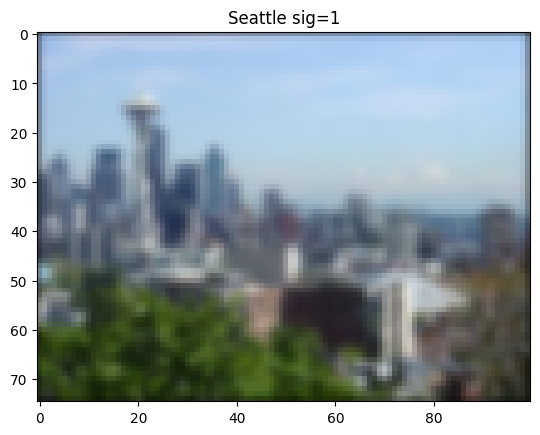

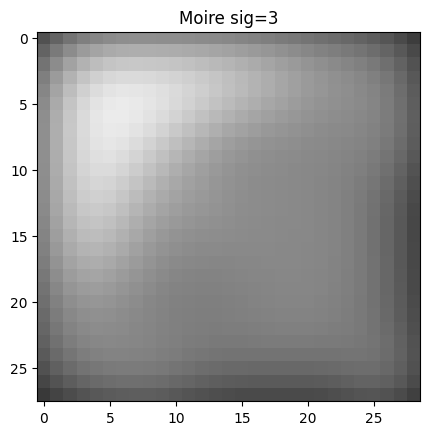

In [15]:
img_1 = DownSampling(img_seattle, 8)
img_1 = GaussianBlurImage(img_1, sigma=1.0)
plt.imshow(img_1.astype(np.uint8), cmap = None)
plt.title("Seattle sig=1")
plt.show()

img_2 = DownSampling(img_moire, 8)
img_2 = GaussianBlurImage(img_2, sigma=3.0)
plt.imshow(img_2.astype(np.uint8), cmap = None)
plt.title("Moire sig=3")
plt.show()

When down sampling an image by 8x, images that have small repetitive patterns are more susceptible of aliasing, therefore, Moire.jpg that has those repetitive circle pattern will need a larger sigma to smooth the blurring efficiently compared to a landscape image like Seattle.jpg.

In my observation, when I was down-sampling Moire.jpg and smoothing it with only sigma=1, I could see some roundy patterns that are not present in the original image, so I would apply a blur of sigma = 3 so that there is no aliasing.

For Seattle.jpg, a smoothing of sigma = 1 or 1.5 is already enough due to the common patterns present in the image. There are little to no presence of aliasing.

# Q2

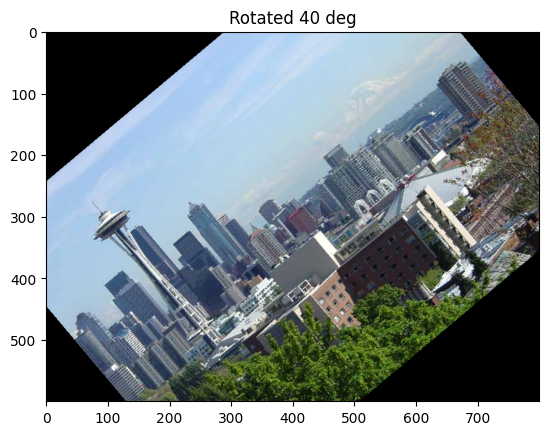

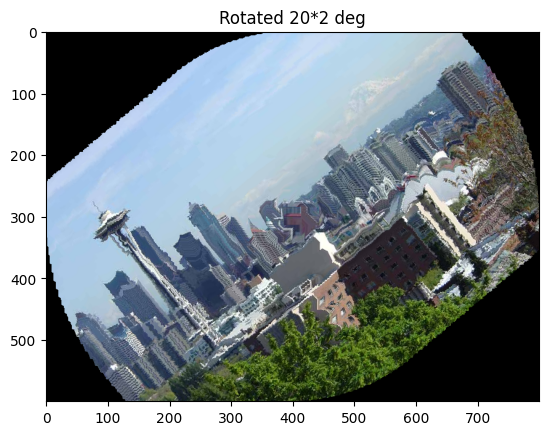

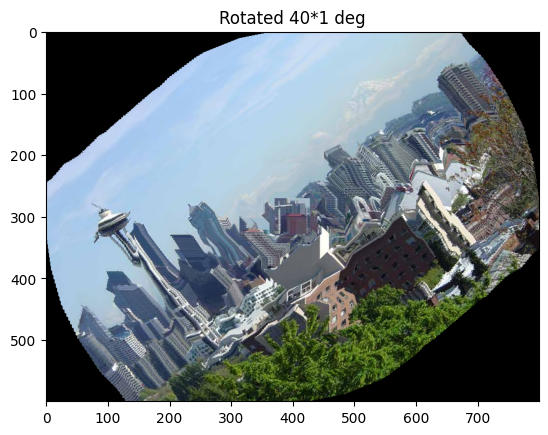

In [43]:
img_seattle = Image.open('/content/Seattle.jpg')
img_seattle40 = img_seattle.rotate(40)
img_seattle40 = np.array(img_seattle40).astype(np.uint8)
plt.imshow(img_seattle40.astype(np.uint8), cmap = None)
plt.title("Rotated 40 deg")
plt.show()

img_seattle20 = img_seattle
for i in range(20):
    img_seattle20 = img_seattle20.rotate(2)

plt.imshow(img_seattle20)
plt.title('Rotated 20*2 deg')
plt.show()

img_seattle40 = img_seattle
for i in range(40):
    img_seattle40 = img_seattle40.rotate(1)

plt.imshow(img_seattle40)
plt.title('Rotated 40*1 deg')
plt.show()

2. Rotating the image 20 times by 2 degrees does not produce the same image as rotating the image by 40 degrees because when rotating, the resampling of the image is done to the nearest, therefore, the more time the rotate() is done, the larger the difference will be. (As we can see with the images above)